# Building Travel Package Price Prediction Model

In [143]:
# Installing
!pip install sentence-transformers

In [144]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
df = pd.read_csv('/content/marketing_sample_for_makemytrip_com-travel__20190901_20190930__30k_data.csv',on_bad_lines='skip')
# Display the first few rows of the dataset
df.shape

(27454, 22)

In [147]:
df = df.sample(n=2000, random_state=42)

In [148]:
# Summary statistics of numeric columns
df.describe() #Continuous variable

,Flight Stops,Meals,Price Per Two Persons,Per Person Price,Initial Payment For Booking,Date Change Rules
count,0.0,0.0,2000.000000,2000.000000,0.0,0.0
mean,NaN,NaN,39653.702500,19826.851250,NaN,NaN
std,NaN,NaN,22914.319674,11457.159837,NaN,NaN
min,NaN,NaN,4279.000000,2139.500000,NaN,NaN
25%,NaN,NaN,24983.250000,12491.625000,NaN,NaN
50%,NaN,NaN,35059.000000,17529.500000,NaN,NaN
75%,NaN,NaN,49066.750000,24533.375000,NaN,NaN
max,NaN,NaN,342125.000000,171062.500000,NaN,NaN


In [149]:

# Check for missing values
df.isnull().sum()

,0
Uniq Id,0
Crawl Timestamp,0
Package Name,0
Page Url,0
Package Type,0
Company,0
Destination,0
Itinerary,0
Places Covered,0
Travel Date,0


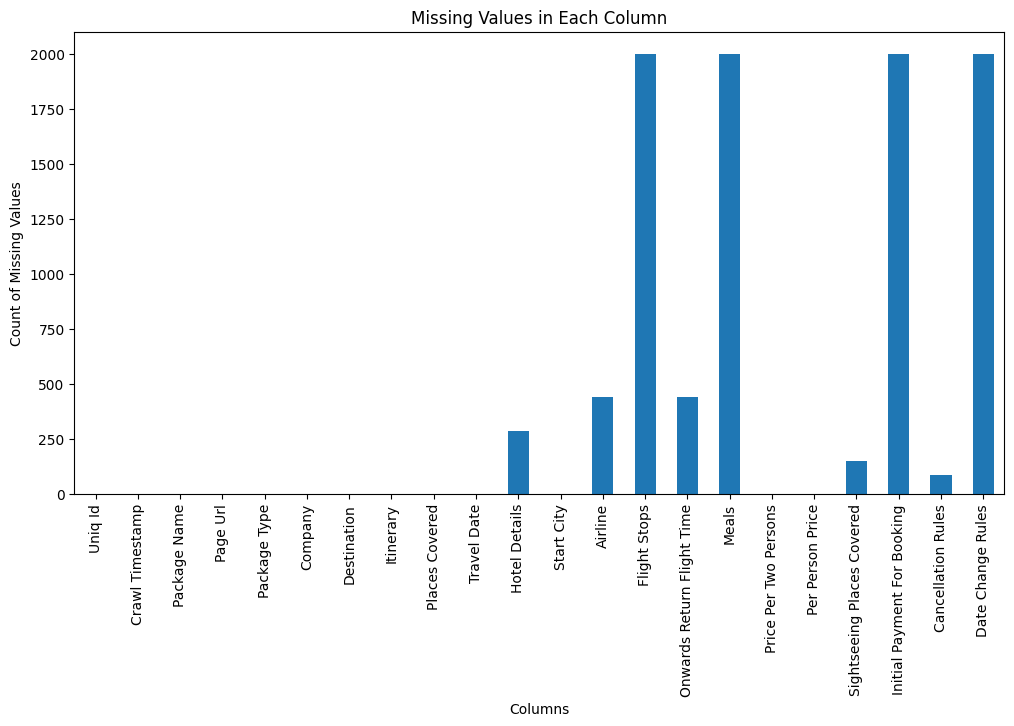

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called 'df'
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [151]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2000, 22)


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 17379 to 10969
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Uniq Id                      2000 non-null   object 
 1   Crawl Timestamp              2000 non-null   object 
 2   Package Name                 2000 non-null   object 
 3   Page Url                     2000 non-null   object 
 4   Package Type                 2000 non-null   object 
 5   Company                      2000 non-null   object 
 6   Destination                  2000 non-null   object 
 7   Itinerary                    2000 non-null   object 
 8   Places Covered               2000 non-null   object 
 9   Travel Date                  2000 non-null   object 
 10  Hotel Details                1714 non-null   object 
 11  Start City                   2000 non-null   object 
 12  Airline                      1562 non-null   object 
 13  Flight Stops      

In [153]:
# Filling missing values for Hotel Details with 'Not Available'
df['Hotel Details'].fillna('Not Available', inplace=True)

# Filling missing values for Airline with 'Not Available'
df['Airline'].fillna('Not Available', inplace=True)

# Filling missing values for Onwards Return Flight Time with 'Not Available'
df['Onwards Return Flight Time'].fillna('Not Available', inplace=True)

# Filling missing values for Sightseeing Places Covered with 'Not Available'
df['Sightseeing Places Covered'].fillna('Not Available', inplace=True)

# Filling missing values for Initial Payment For Booking with 0 (assuming no initial payment)
df['Initial Payment For Booking'].fillna(0, inplace=True)

# Filling missing values for Cancellation Rules with 'Not Available'
df['Cancellation Rules'].fillna('Not Available', inplace=True)

# Dropping columns with all missing values (Flight Stops, Date Change Rules, Unnamed: 22, Unnamed: 23)
df.drop(columns=["Flight Stops", "Meals", "Initial Payment For Booking", "Date Change Rules"], inplace=True)

# Print the first few rows to check the changes
df.head()

/tmp/ipython-input-3491861512.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hotel Details'].fillna('Not Available', inplace=True)
/tmp/ipython-input-3491861512.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,Uniq Id,Crawl Timestamp,Package Name,Page Url,Package Type,Company,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Onwards Return Flight Time,Price Per Two Persons,Per Person Price,Sightseeing Places Covered,Cancellation Rules
17379,41c0c778519c0c95a5c303aef863f849,2019-09-17 14:08:32 +0000,Himachal Wonders with Amritsar from Chandigarh...,https://holidayz.makemytrip.com/holidays/india...,Deluxe,Makemytrip,Shimla|Manali|Amritsar,3N Shimla . 3N Manali . 2N Amritsar,Shimla|Manali|Amritsar,20-09-2019,Kyriad Hotel Shimla (A unit of Hotel C K Int.)...,New Delhi,IndiGo,09 : 10-11 : 45,37227,18613.5,Mall road | Pinjore Gardens | Kufri | Indira ...,Cancellation any time after making the 1st pay...
25018,94d81d6658a46e6e68558b83a9f6ea26,2019-09-16 12:03:34 +0000,Mesmerising Kerala,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Munnar|Thekkady|Kumarakom,2N Munnar . 1N Thekkady . 1N Kumarakom,Munnar|Thekkady|Kumarakom,25-09-2019,Iceberg Hill Hotel-MMT Holidays Special:3.5|El...,New Delhi,Go Air,08 : 50-10 : 50,35077,17538.5,Not Available,Cancellation any time after making the 1st pay...
14314,9e6ff42d2c2677f1d2086643f53e7e2b,2019-09-16 09:32:42 +0000,5 Nights in Ooty,https://holidayz.makemytrip.com/holidays/india...,Premium,Makemytrip,Mysore|Coorg|Ooty,1N Mysore . 2N Coorg . 2N Ooty,Mysore|Coorg|Ooty,25-09-2019,"Country Inn And Suites By Radisson, Mysore:4.5...",New Delhi,Spicejet,09 : 20-11 : 10,33935,16967.5,Chamundi Hills | Mysore Zoo | St. Philomena C...,Cancellation any time after making the 1st pay...
8910,76c844623825d677ad8991338e0715db,2019-09-18 08:57:24 +0000,Romantic Goa Weekend with a Personal Photoshoot,https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,Goa,3N Goa,Goa,05-10-2019,Estrela Do Mar Beach Resort - A Beach Property:4,New Delhi,Go Air,15 : 05-16 : 35,22015,11007.5,MMT - Candid Photographer in Goa,This cancellation policy is applicable for boo...
8246,5efcb1ab61cae02fbe3459aaad7d665f,2019-09-25 07:07:24 +0000,"Haridwar, Rishikesh & Mussoorie with a night i...",https://holidayz.makemytrip.com/holidays/india...,Standard,Makemytrip,New Delhi|Haridwar|Rishikesh|Mussoorie,1N New Delhi . 1N Haridwar . 1N Rishikesh . 2N...,New Delhi|Haridwar|Rishikesh|Mussoorie,02-10-2019,Red Fox Hotel Delhi Airport:3.9|Ganga Lahari B...,Mumbai,Vistara,05 : 05-07 : 05,32079,16039.5,Har Ki Pauri | Ganga Aarti | Laxman Jhula | B...,Cancellation any time after making the 1st pay...


In [154]:
#Unique Values
print('Unique Values')
print('1 Uniq Id: ' + str(len(df['Uniq Id'].unique())))
print('2 Crawl Timestamp: ' + str(len(df['Crawl Timestamp'].unique())))
print('3 Package Name: ' + str(len(df['Package Name'].unique())))
print('4 Page Url: ' + str(len(df['Page Url'].unique())))
print('5 Package Type: ' + str(len(df['Package Type'].unique())))
print('6 Company: ' + str(len(df['Company'].unique())))
print('7 Destination: ' + str(len(df['Destination'].unique())))
print('8 Itinerary: ' + str(len(df['Itinerary'].unique())))
print('9 Places Covered: ' + str(len(df['Places Covered'].unique())))
print('10 Travel Date: ' + str(len(df['Travel Date'].unique())))
print('11 Hotel Details: ' + str(len(df['Hotel Details'].unique())))
print('12 Start City: ' + str(len(df['Start City'].unique())))
print('13 Airline: ' + str(len(df['Airline'].unique())))
print('14 Onwards Return Flight Time: ' + str(len(df['Onwards Return Flight Time'].unique())))
print('15 Price Per Two Persons: ' + str(len(df['Price Per Two Persons'].unique())))
print('16 Per Person Price: ' + str(len(df['Per Person Price'].unique())))
print('17 Sightseeing Places Covered: ' + str(len(df['Sightseeing Places Covered'].unique())))
print('18 Cancellation Rules: ' + str(len(df['Cancellation Rules'].unique())))

Unique Values
1 Uniq Id: 2000
2 Crawl Timestamp: 1991
3 Package Name: 1239
4 Page Url: 1992
5 Package Type: 79
6 Company: 6
7 Destination: 415
8 Itinerary: 728
9 Places Covered: 480
10 Travel Date: 108
11 Hotel Details: 1224
12 Start City: 2
13 Airline: 108
14 Onwards Return Flight Time: 492
15 Price Per Two Persons: 1956
16 Per Person Price: 1956
17 Sightseeing Places Covered: 916
18 Cancellation Rules: 3


In [155]:
df['Travel Date'] = pd.to_datetime(df['Travel Date'], format='%d-%m-%Y', errors='coerce')

In [156]:
# As Package Type must have only ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget'] we remove the rest
allowed_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget'] #Data Filteration

# Filter the DataFrame to keep only the rows with allowed package types
df = df[df['Package Type'].isin(allowed_package_types)]

In [157]:
df.drop('Company', axis=1, inplace=True)

In [158]:
# As crawl timestamp is date and time when the data was collected or crawled from a source so not important
df.drop('Crawl Timestamp', axis=1, inplace=True)

In [159]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [160]:
# Check for missing values
df.isnull().sum()

,0
Uniq Id,0
Package Name,0
Page Url,0
Package Type,0
Destination,0
Itinerary,0
Places Covered,0
Travel Date,0
Hotel Details,0
Start City,0


## Exploratory Data Analysis

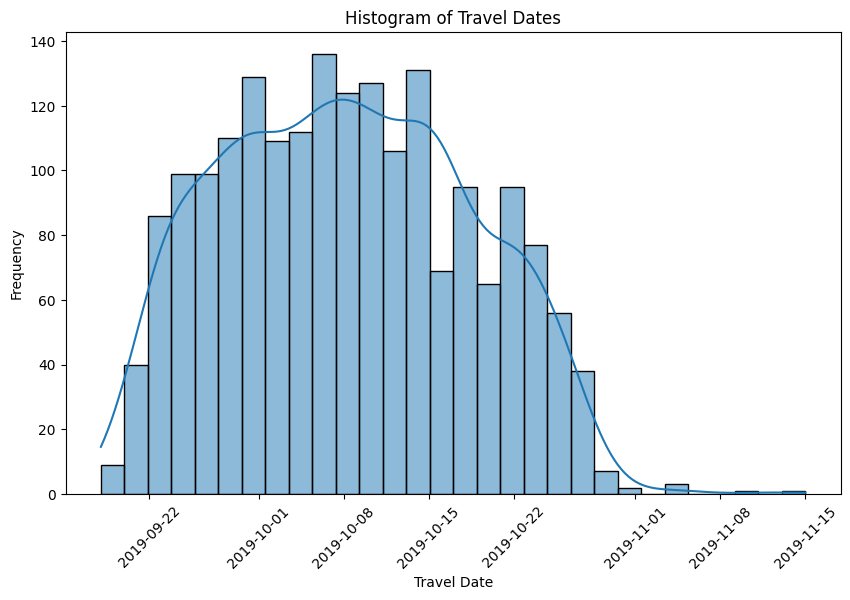

In [161]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Travel Date'], bins=30, kde=True)
plt.title('Histogram of Travel Dates')
plt.xlabel('Travel Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

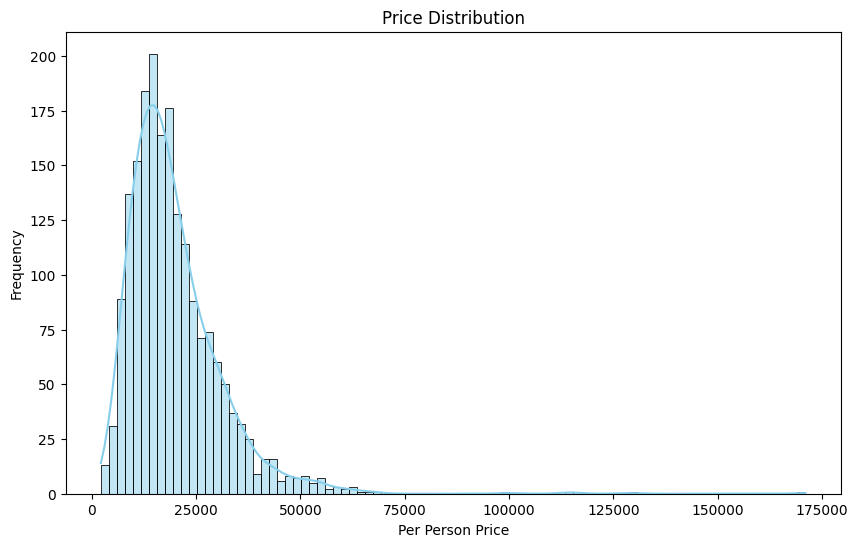

In [162]:
# Price Distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Per Person Price'], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Per Person Price')
plt.ylabel('Frequency')
plt.show()

Inference:
Right-skewed, with prices tapering off as they increase.

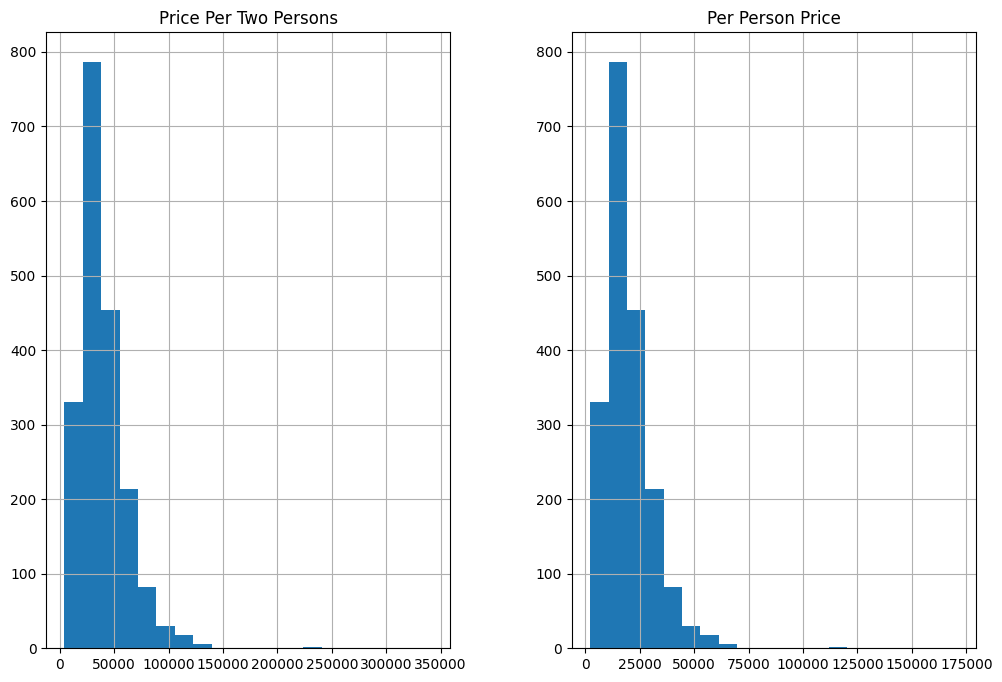

In [163]:
# Plot histograms for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.show()

Price Per Two Persons: The distribution appears to be right-skewed, with a concentration of lower prices.

Per Person Price: This is the target variable, and its distribution shows some variation with a peak around a certain price range.

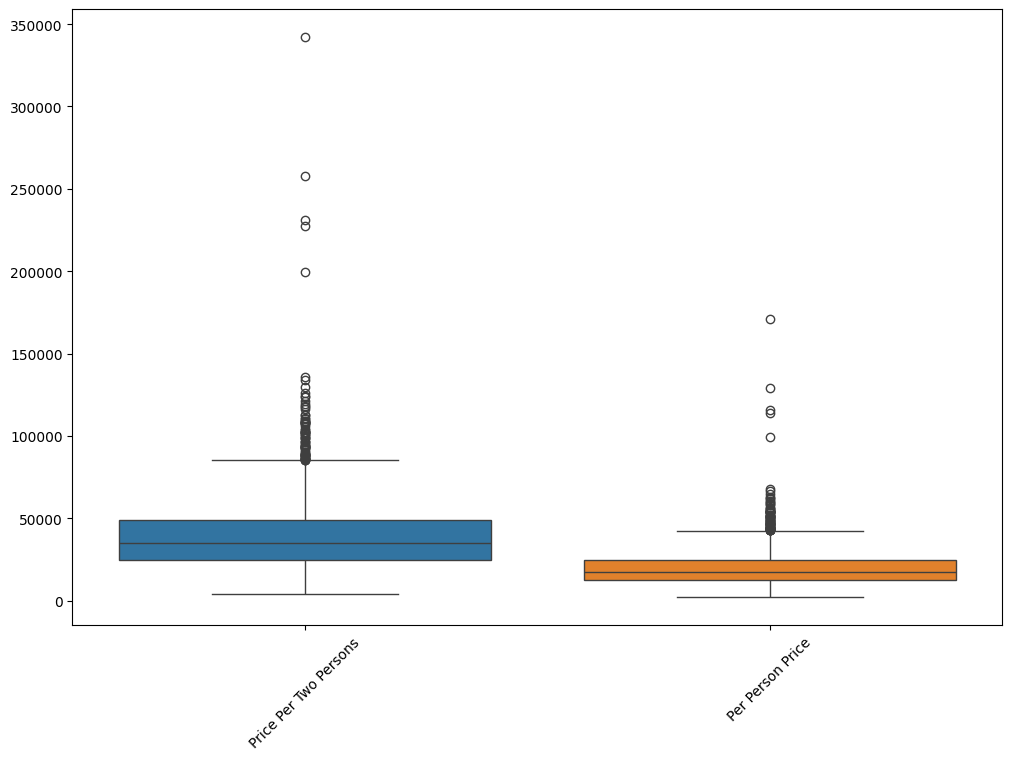

In [164]:
# Plot box plots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.show()

Price Per Two Persons: There are a few outliers with significantly higher prices than the majority of the packages.

Per Person Price: This variable has a similar distribution with some outliers on the higher price side.

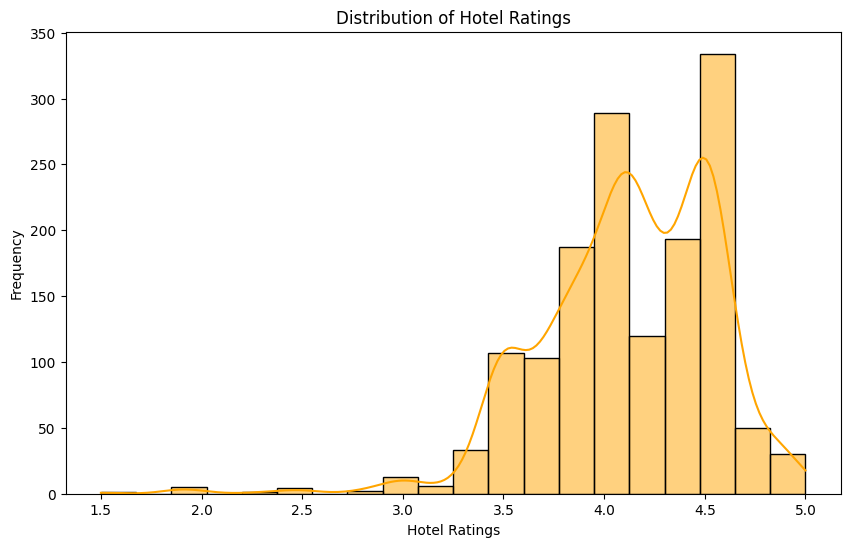

In [165]:
# Hotel Ratings Distribution

hotel_ratings = df['Hotel Details'].str.extract(r'(\d+\.\d+)')
hotel_ratings = pd.to_numeric(hotel_ratings[0], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(hotel_ratings, bins=20, kde=True, color='orange')
plt.title('Distribution of Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Frequency')
plt.show()

Inference: Hotel ratings are left skewed with more frequency ranges between 3.5 to 4.5 but some are having lower ratings also

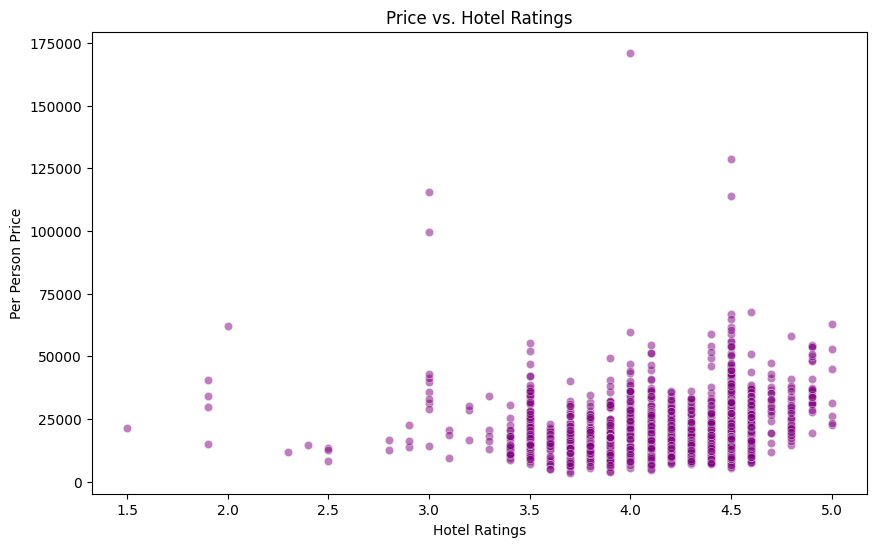

In [166]:
# Price vs. Hotel Ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=hotel_ratings, y='Per Person Price', color='purple', alpha=0.5)
plt.title('Price vs. Hotel Ratings')
plt.xlabel('Hotel Ratings')
plt.ylabel('Per Person Price')
plt.show()

Inference: There are some clusters of points, suggesting that specific rating ranges may have an impact on price within certain regions.

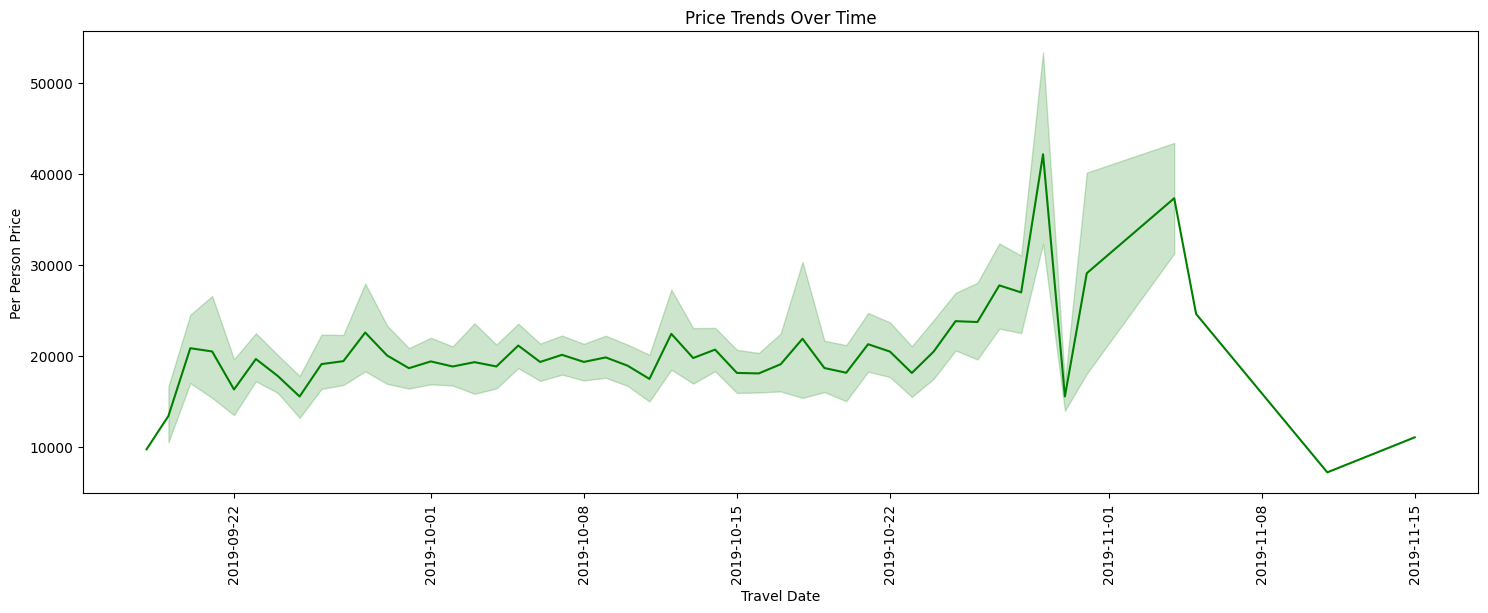

In [167]:
# Price vs. Travel Date

plt.figure(figsize=(18, 6))
sns.lineplot(data=df, x='Travel Date', y='Per Person Price', color='green')
plt.title('Price Trends Over Time')
plt.xlabel('Travel Date')
plt.ylabel('Per Person Price')
plt.xticks(rotation=90)
plt.show()

Inference:

Price Fluctuation: The plot shows the relationship between "Per Person Price" and "Travel Date."

Seasonal Patterns: There appear to be fluctuations in prices over time, suggesting potential seasonal variations in travel costs.

Need for Data Preprocessing: The plot indicates that the data may not be entirely clean or properly structured, as there seem to be abrupt changes in price trends that might require further investigation and data preprocessing.

Outliers: There are some extreme price values visible, indicating the presence of outliers that may need to be addressed in the analysis.

Overall Trend: While there are fluctuations, it's challenging to identify a clear overall trend from this plot. Further statistical analysis may be necessary to uncover any significant patterns.

Data Granularity: The granularity of the "Travel Date" data could affect the interpretation, as it might be daily, monthly, or at some other interval.

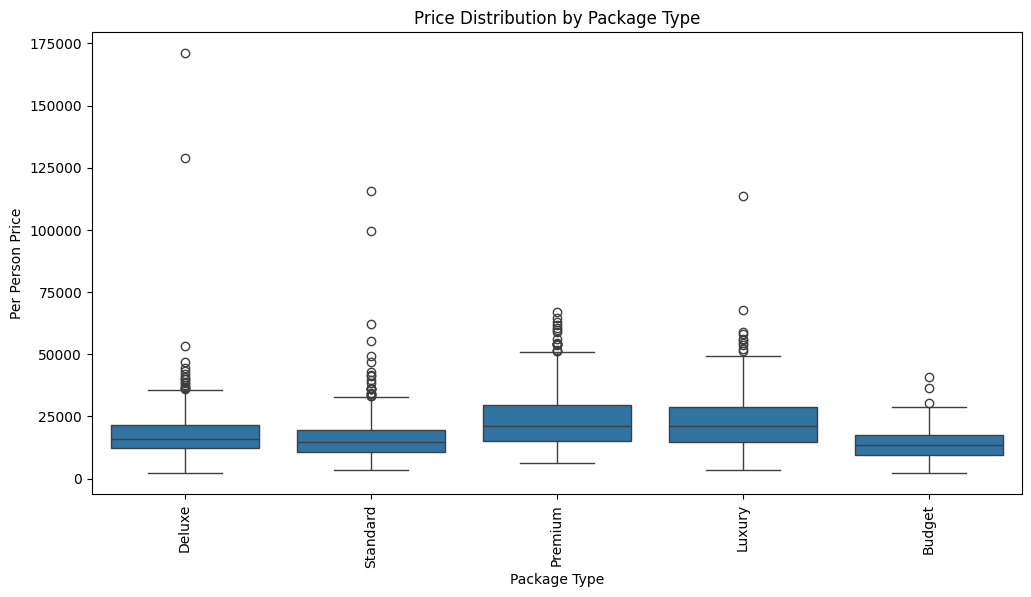

In [168]:
# Box Plots:
# Visualize the distribution of prices per package type:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Package Type', y='Per Person Price')
plt.xticks(rotation=90)
plt.xlabel('Package Type')
plt.ylabel('Per Person Price')
plt.title('Price Distribution by Package Type')
plt.show()

Variability: Some package types have a wider range of prices (larger boxes), while others have narrower ranges (smaller boxes).

Outliers: These outliers indicate some extreme price values within those categories.

Median Prices: It's a quick way to compare the typical prices across different categories.

Package Type Impact: Some package types consistently have higher or lower prices than others.

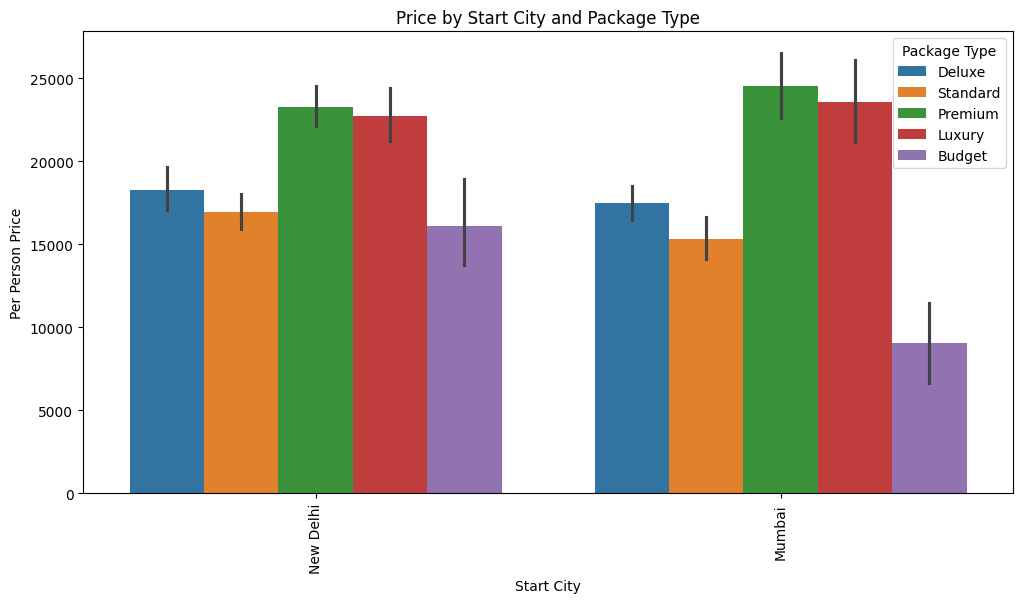

In [169]:
# Bar Plots:
# Explore the relationship between the start city and package types:

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Start City', y='Per Person Price', hue='Package Type')
plt.xticks(rotation=90)
plt.xlabel('Start City')
plt.ylabel('Per Person Price')
plt.title('Price by Start City and Package Type')
plt.show()

This information suggests that both the choice of start city and the selected package type influence the pricing of travel packages.

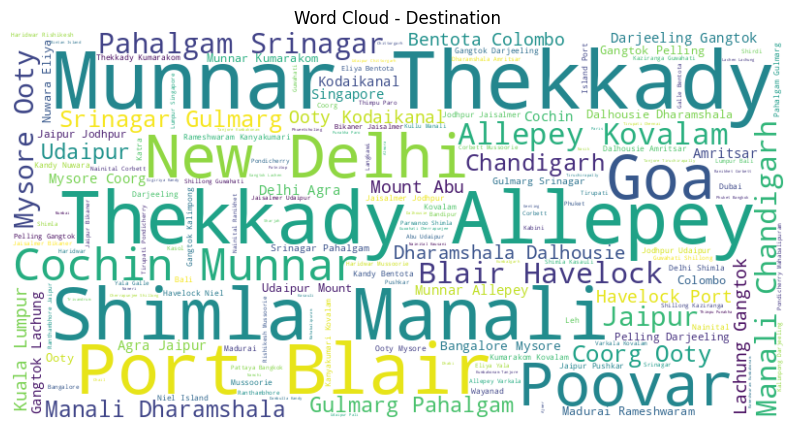

In [170]:
# Word Clouds of destinations:

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Destination']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Destination')
plt.show()

* Shimla, Manali, Thekkady, Alleppey, Munnar, and Goa, New Delhi, These destinations seem to be popular or commonly mentioned in the dataset.

Package Type
Deluxe      548
Standard    530
Premium     498
Luxury      304
Budget       46
Name: count, dtype: int64


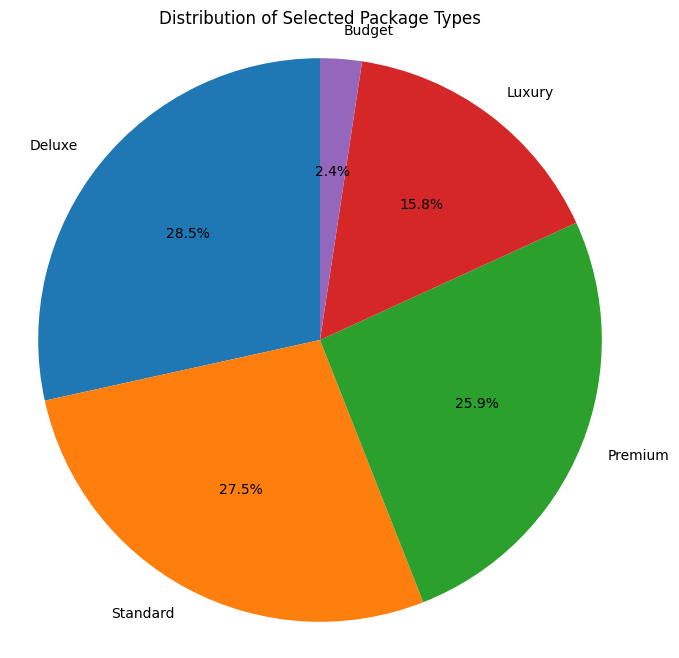

In [171]:
selected_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget']
filtered_df = df[df['Package Type'].isin(selected_package_types)]

# Get the counts of each package type
package_type_counts = filtered_df['Package Type'].value_counts()

# Display the counts of each class in 'Package Type'
print(package_type_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(package_type_counts, labels=package_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Selected Package Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* Deluxe and Standard are the most common package types, each making up a significant portion of the dataset.

* Premium is also fairly common, but slightly less frequent than Deluxe and Standard.

* Luxury packages are less common but still represent a substantial portion of the dataset.

* Budget packages are the least common among the selected types, comprising a relatively small percentage of the dataset.

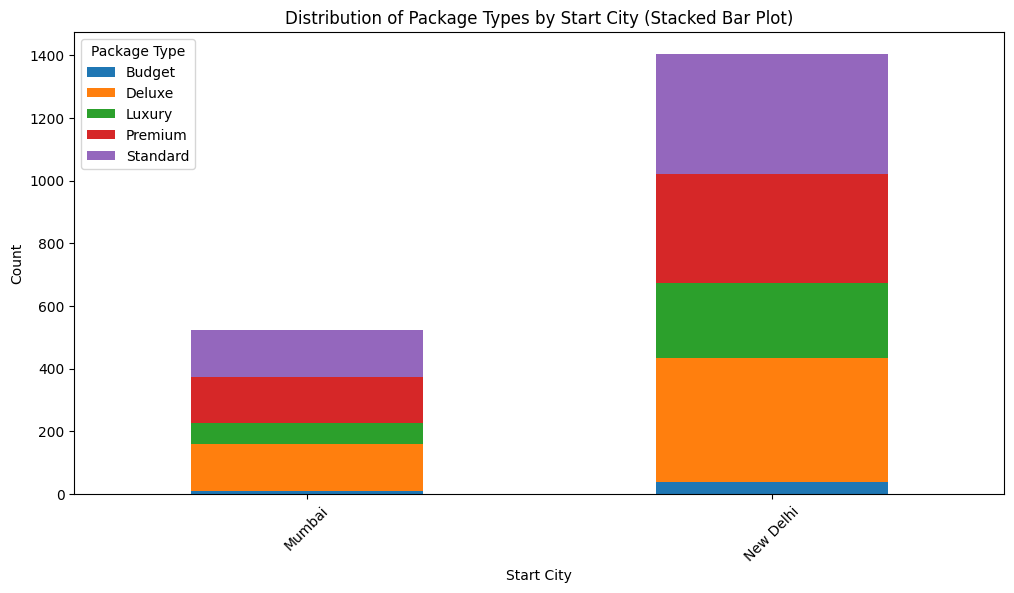

In [172]:
# Stacked Bar Plot:
# Show the distribution of package types by start city using a stacked bar plot:

city_package_counts = df.groupby(['Start City', 'Package Type']).size().unstack(fill_value=0)
city_package_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Start City')
plt.ylabel('Count')
plt.title('Distribution of Package Types by Start City (Stacked Bar Plot)')
plt.xticks(rotation=45)
plt.show()

* This is how the distribution of package types varies across both start cities, providing insights into regional preferences for package types.

In [173]:
df.columns

Index(['Uniq Id', 'Package Name', 'Page Url', 'Package Type', 'Destination',
       'Itinerary', 'Places Covered', 'Travel Date', 'Hotel Details',
       'Start City', 'Airline', 'Onwards Return Flight Time',
       'Price Per Two Persons', 'Per Person Price',
       'Sightseeing Places Covered', 'Cancellation Rules'],
      dtype='object')

In [174]:
# Extracting hotel ratings from Hotel Details
df['Hotel Ratings'] = df['Hotel Details'].str.extract(r'(\d+\.\d+)')

# Convert 'Hotel Ratings' to numeric (float)
df['Hotel Ratings'] = pd.to_numeric(df['Hotel Ratings'], errors='coerce')

In [175]:
df['Hotel Ratings'].isnull().sum()

np.int64(448)

In [176]:
# Calculate the mode of the 'Hotel Ratings' column
mode_rating = df['Hotel Ratings'].mode()[0]

# Replace NaN values with the mode
df['Hotel Ratings'].fillna(mode_rating, inplace=True)
df['Hotel Ratings'].isnull().sum()

/tmp/ipython-input-2779894359.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hotel Ratings'].fillna(mode_rating, inplace=True)


np.int64(0)

In [177]:

# Data is stored in a DataFrame called 'df'
df['Travel Date'] = pd.to_datetime(df['Travel Date'])
df['Travel_Year'] = df['Travel Date'].dt.year
df['Travel_Month'] = df['Travel Date'].dt.month
df['Travel_DayOfWeek'] = df['Travel Date'].dt.dayofweek

### One hot encoding on the columns with low uniques values

In [178]:
# Example of one-hot encoding
df = pd.get_dummies(df, columns=['Package Type','Start City'],  dtype=int)

### Handling Outliers

In [179]:
Q1 = df['Per Person Price'].quantile(0.25)
Q3 = df['Per Person Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
df = df[(df['Per Person Price'] >= lower_bound) & (df['Per Person Price'] <= upper_bound)]

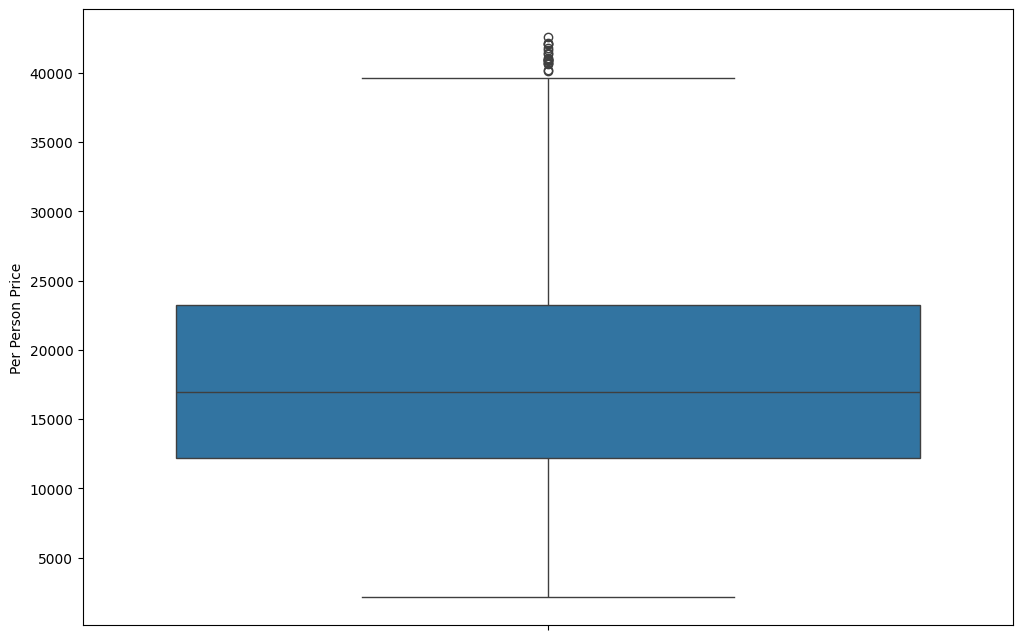

In [180]:
 # Visualization after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df['Per Person Price'])
plt.xticks(rotation=45)
plt.show()

In [181]:
df.head()

,Uniq Id,Package Name,Page Url,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Airline,Onwards Return Flight Time,...,Travel_Year,Travel_Month,Travel_DayOfWeek,Package Type_Budget,Package Type_Deluxe,Package Type_Luxury,Package Type_Premium,Package Type_Standard,Start City_Mumbai,Start City_New Delhi
17379,41c0c778519c0c95a5c303aef863f849,Himachal Wonders with Amritsar from Chandigarh...,https://holidayz.makemytrip.com/holidays/india...,Shimla|Manali|Amritsar,3N Shimla . 3N Manali . 2N Amritsar,Shimla|Manali|Amritsar,2019-09-20,Kyriad Hotel Shimla (A unit of Hotel C K Int.)...,IndiGo,09 : 10-11 : 45,...,2019,9,4,0,1,0,0,0,0,1
25018,94d81d6658a46e6e68558b83a9f6ea26,Mesmerising Kerala,https://holidayz.makemytrip.com/holidays/india...,Munnar|Thekkady|Kumarakom,2N Munnar . 1N Thekkady . 1N Kumarakom,Munnar|Thekkady|Kumarakom,2019-09-25,Iceberg Hill Hotel-MMT Holidays Special:3.5|El...,Go Air,08 : 50-10 : 50,...,2019,9,2,0,0,0,0,1,0,1
14314,9e6ff42d2c2677f1d2086643f53e7e2b,5 Nights in Ooty,https://holidayz.makemytrip.com/holidays/india...,Mysore|Coorg|Ooty,1N Mysore . 2N Coorg . 2N Ooty,Mysore|Coorg|Ooty,2019-09-25,"Country Inn And Suites By Radisson, Mysore:4.5...",Spicejet,09 : 20-11 : 10,...,2019,9,2,0,0,0,1,0,0,1
8910,76c844623825d677ad8991338e0715db,Romantic Goa Weekend with a Personal Photoshoot,https://holidayz.makemytrip.com/holidays/india...,Goa,3N Goa,Goa,2019-10-05,Estrela Do Mar Beach Resort - A Beach Property:4,Go Air,15 : 05-16 : 35,...,2019,10,5,0,0,0,0,1,0,1
8246,5efcb1ab61cae02fbe3459aaad7d665f,"Haridwar, Rishikesh & Mussoorie with a night i...",https://holidayz.makemytrip.com/holidays/india...,New Delhi|Haridwar|Rishikesh|Mussoorie,1N New Delhi . 1N Haridwar . 1N Rishikesh . 2N...,New Delhi|Haridwar|Rishikesh|Mussoorie,2019-10-02,Red Fox Hotel Delhi Airport:3.9|Ganga Lahari B...,Vistara,05 : 05-07 : 05,...,2019,10,2,0,0,0,0,1,1,0


In [182]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

k = 15  # Replace with the desired number of top features
selected_features = correlation_matrix['Per Person Price'].abs().sort_values(ascending=False).index[2:k+1]

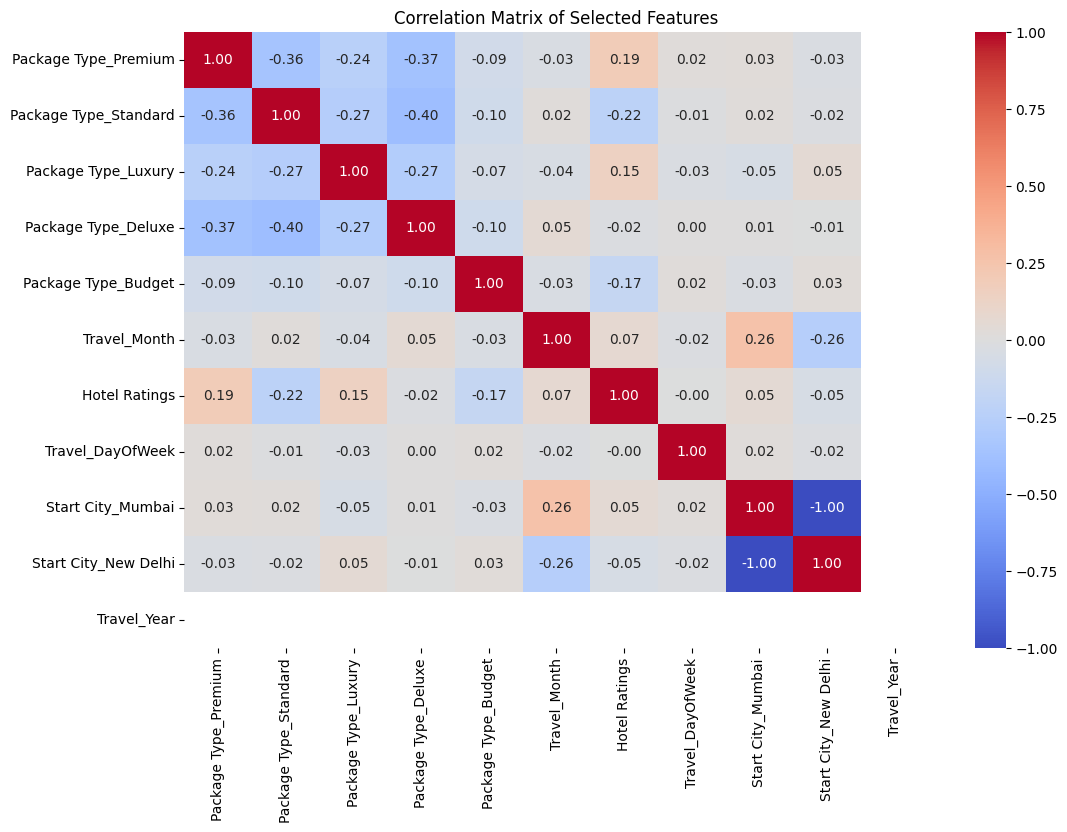

In [183]:
# Create a subset of the DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = subset_df.corr()

# Set up the plot figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation Matrix of Selected Features')

# Show the plot
plt.show()

As evident from our analysis, there is minimal correlation among the numerical features.

### Text Embedding and Feature Preparation


In [184]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

In [189]:
# Encode text-based columns and create embeddings
text_columns = ['Package Name', 'Destination', 'Itinerary', 'Places Covered', 'Hotel Details', 'Airline', 'Sightseeing Places Covered', 'Cancellation Rules']

for column in text_columns:
    df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))

# Concatenate the embeddings into a single feature vector
text_embeddings = df[text_columns].values.tolist()

In [190]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/processed_data.csv', index=False)

In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

#  Apply PCA separately to each text embedding column
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

# Create an empty array to store the PCA-transformed embeddings
text_embeddings_pca = np.empty((len(df), n_components * len(text_columns)))

for i, column in enumerate(text_columns):
    embeddings = df[column + '_embedding'].values.tolist()
    embeddings_pca = pca.fit_transform(embeddings)
    text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

# Combine text embeddings with other numerical features if available
numerical_features = [
    'Package Type_Standard', 'Package Type_Premium', 'Package Type_Luxury',
    'Travel_Month', 'Package Type_Budget', 'Package Type_Deluxe',
    'Hotel Ratings', 'Start City_New Delhi', 'Start City_Mumbai',
    'Travel_DayOfWeek', 'Travel_Year'
]

#saving the pca analysis
import joblib
joblib.dump(pca, '/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/pca.joblib')

['/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/pca.joblib']

In [192]:
X_numerical = df[numerical_features].values

# Combine PCA-transformed text embeddings and numerical features
X = np.hstack((text_embeddings_pca, X_numerical))
# Target variable
y = df['Per Person Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#saving the pca model
import joblib
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/scaler.joblib')

['/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/scaler.joblib']

## Model Creation and Training
### Linear Regression model

Mean Absolute Error (MAE): 3515.0129525251236
Mean Squared Error (MSE): 23289245.9819404
Root Mean Squared Error (RMSE): 4825.893283314541
R-squared (R2): 0.6672471993814628


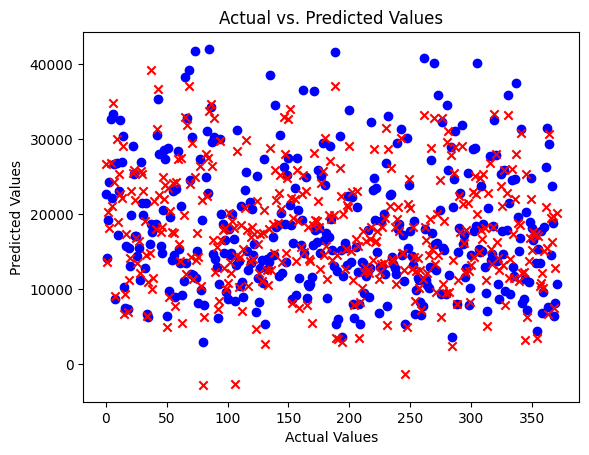

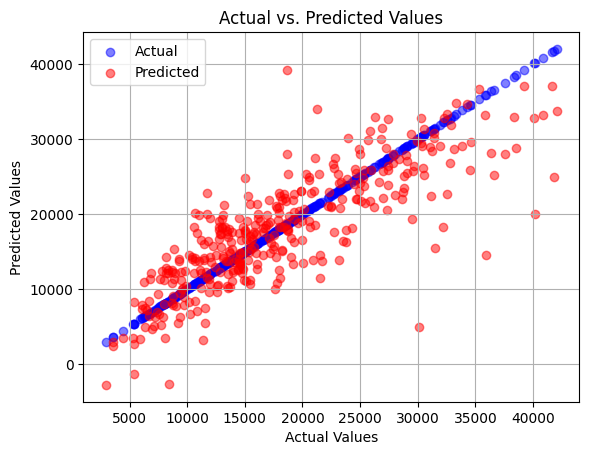

In [193]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [196]:
#Saving the LR model
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/linear_reg_latest.pkl', 'wb') as file:
    pickle.dump(model, file)

import joblib
joblib.dump(model, 'lr_model.joblib')

['lr_model.joblib']

Mean Squared Error (MSE): 42781401.60309973
Root Mean Squared Error (RMSE): 6540.7493151090675
Mean Absolute Error (MAE): 4602.907008086253
R-squared (R2) Score: 0.38874658248460237


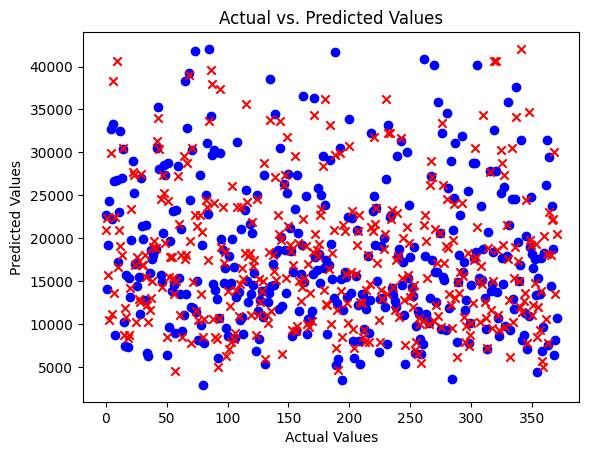

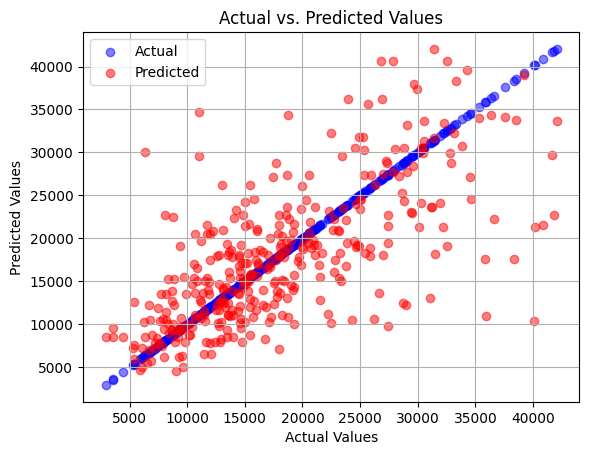

In [197]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [198]:
#Saving the DT model
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/decision_tree_reg_latest.pkl', 'wb') as file:
    pickle.dump(decision_tree_reg, file)

import joblib
joblib.dump(decision_tree_reg, '/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/decision_tree_reg_latest.joblib')

['/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/decision_tree_reg_latest.joblib']

Mean Absolute Error (MAE): 3591.769048268235
Mean Squared Error (MSE): 23142747.554516483
Root Mean Squared Error (RMSE): 4810.690964353924
R-squared (R2): 0.6693403440907987


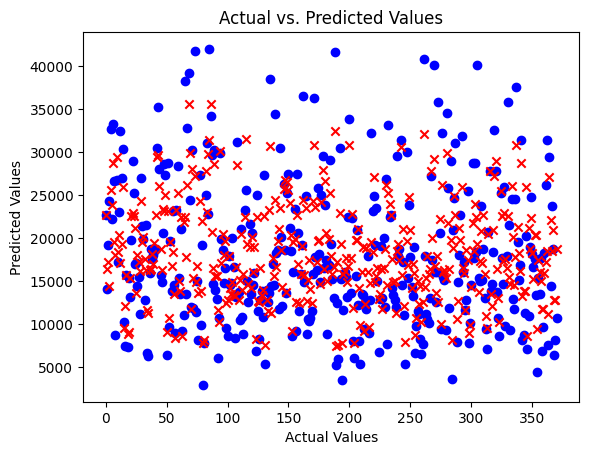

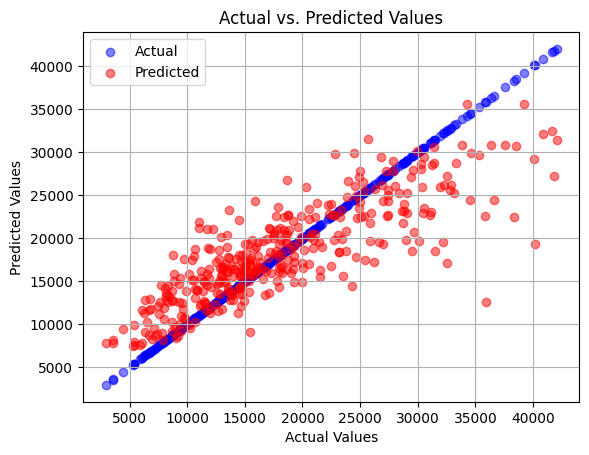

In [199]:
# Create and train the Linear Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 2, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Assuming y_test contains the actual values and y_pred contains the predicted values

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Hyperparamter Tuning

In [200]:
# Linear Regression Hyperparameter Tuning
linear_reg = LinearRegression()

# Define hyperparameters and their potential values
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Create a GridSearchCV object for Linear Regression
grid_search_linear = GridSearchCV(linear_reg, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)

# Get the best hyperparameters for Linear Regression
best_linear_reg = grid_search_linear.best_estimator_

In [201]:
# Decision Tree Regressor Hyperparameter Tuning
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Decision Tree Regressor
grid_search_decision_tree = GridSearchCV(decision_tree_reg, param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree Regressor
best_decision_tree_reg = grid_search_decision_tree.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

In [208]:
from sklearn.model_selection import RandomizedSearchCV
# Random Forest Regression Hyperparameter Tuning
random_forest_reg = RandomForestRegressor(random_state=42)

# Define hyperparameters and their potential values
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Random Forest Regression
# try only 20 random combos
random_search_rf = RandomizedSearchCV(random_forest_reg, param_grid_rf,n_iter=20,
    cv=3, scoring='neg_mean_squared_error',n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest Regression
best_rf_reg = random_search_rf.best_estimator_

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

## Model Evaluation

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data using the best models
y_pred_lr = best_linear_reg.predict(X_test)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)
y_pred_rf = best_rf_reg.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_lr)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_lr)
r2_linear = r2_score(y_test, y_pred_lr)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate adjusted R-squared for linear regression
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2_linear = 1 - ((1 - r2_linear) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for decision tree regressor
adj_r2_decision_tree = 1 - ((1 - r2_decision_tree) * (n - 1) / (n - p - 1))

# Calculate adjusted R-squared for random forest regression
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

print("Linear Regression:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R2) Score:", r2_linear)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_linear)

print("\nDecision Tree Regressor:")
print("Mean Squared Error (MSE):", mse_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_decision_tree)
print("Mean Absolute Error (MAE):", mae_decision_tree)
print("R-squared (R2) Score:", r2_decision_tree)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_decision_tree)

print("\nRandom Forest Regression:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2) Score:", r2_rf)
print("Adjusted R-squared (Adj R2) Score:", adj_r2_rf)

Linear Regression:
Mean Squared Error (MSE): 32495320.677180164
Root Mean Squared Error (RMSE): 5700.466706961823
Mean Absolute Error (MAE): 4308.207189208315
R-squared (R2) Score: 0.5357123639505543
Adjusted R-squared (Adj R2) Score: 0.018363283781172024

Decision Tree Regressor:
Mean Squared Error (MSE): 48997805.35926476
Root Mean Squared Error (RMSE): 6999.843238192178
Mean Absolute Error (MAE): 5194.753407607483
R-squared (R2) Score: 0.29992765888168527
Adjusted R-squared (Adj R2) Score: -0.4801529497930084

Random Forest Regression:
Mean Squared Error (MSE): 27614341.922188144
Root Mean Squared Error (RMSE): 5254.935006466601
Mean Absolute Error (MAE): 3891.8995342917046
R-squared (R2) Score: 0.6054509614020401
Adjusted R-squared (Adj R2) Score: 0.16581060410717052


In [219]:
import pandas as pd

# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'Adj R2'])

# Add values for Linear Regression
metrics_df = pd.DataFrame({
    'Model': 'Linear Regression',
    'MSE': round(mse_linear, 2),
    'RMSE': round(rmse_linear, 2),
    'MAE': round(mae_linear, 2),
    'R2': round(r2_linear, 2),
    'Adj R2': round(adj_r2_linear, 2)}, index=[0])

# Add values for Decision Tree Regressor
metrics_df1 = pd.DataFrame({
    'Model': 'Decision Tree Regressor',
    'MSE': round(mse_decision_tree, 2),
    'RMSE': round(rmse_decision_tree, 2),
    'MAE': round(mae_decision_tree, 2),
    'R2': round(r2_decision_tree, 2),
    'Adj R2': round(adj_r2_decision_tree, 2)}, index=[0])

# Add values for Random Forest Regression
metrics_df2 = pd.DataFrame({
    'Model': 'Random Forest Regression',
    'MSE': round(mse_rf, 2),
    'RMSE': round(rmse_rf, 2),
    'MAE': round(mae_rf, 2),
    'R2': round(r2_rf, 2),
    'Adj R2': round(adj_r2_rf, 2)
}, index=[0])

# Combine the DataFrame
combined_metrics_df = pd.concat([metrics_df, metrics_df1, metrics_df2], ignore_index=True)

# Display the combined DataFrame
combined_metrics_df

,Model,MSE,RMSE,MAE,R2,Adj R2
0,Linear Regression,32495320.68,5700.47,4308.21,0.54,0.02
1,Decision Tree Regressor,48997805.36,6999.84,5194.75,0.30,-0.48
2,Random Forest Regression,27614341.92,5254.94,3891.90,0.61,0.17


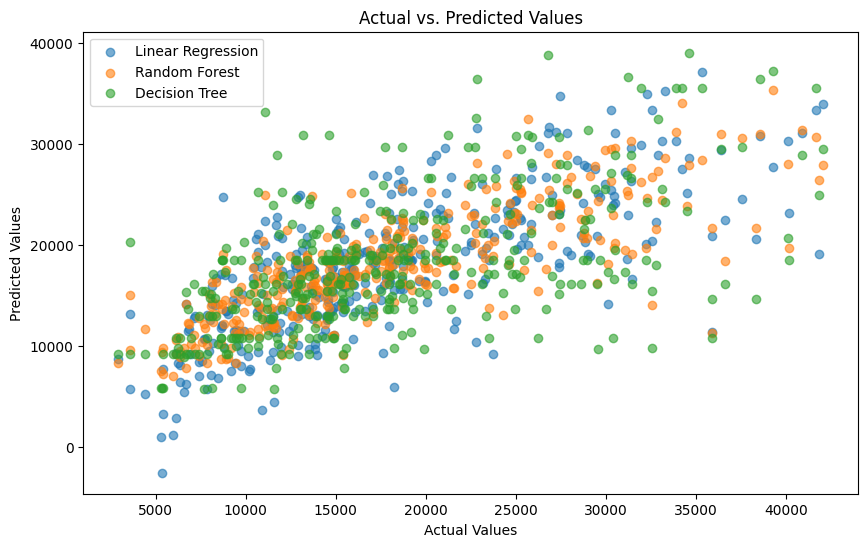

In [220]:
plt.figure(figsize=(10, 6))

# Linear Regression
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor
plt.scatter(y_test, y_pred_decision_tree, label='Decision Tree', alpha=0.6)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

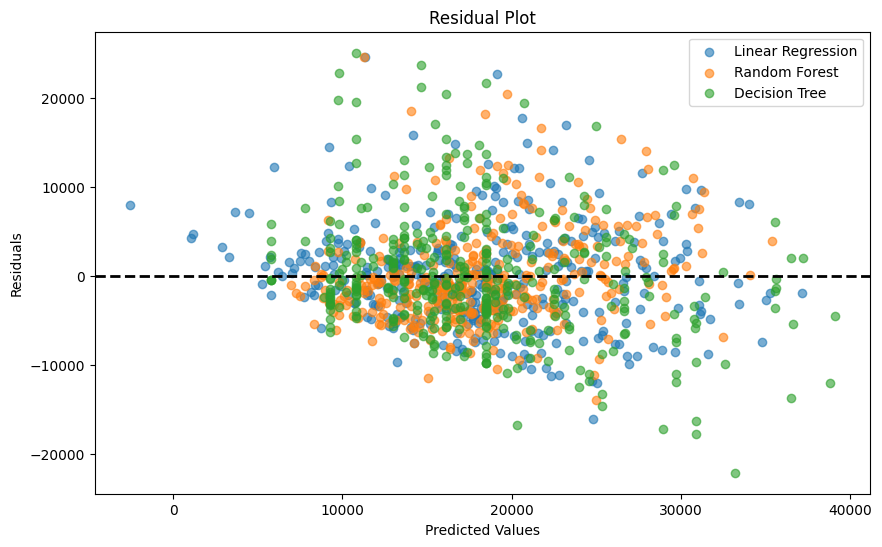

In [221]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals
residuals_lr = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals_lr, label='Linear Regression', alpha=0.6)

# Random Forest Regressor Residuals
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, label='Random Forest', alpha=0.6)

# Decision Tree Regressor Residuals
residuals_dt = y_test - y_pred_decision_tree
plt.scatter(y_pred_decision_tree, residuals_dt, label='Decision Tree', alpha=0.6)

plt.axhline(0, color='black', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

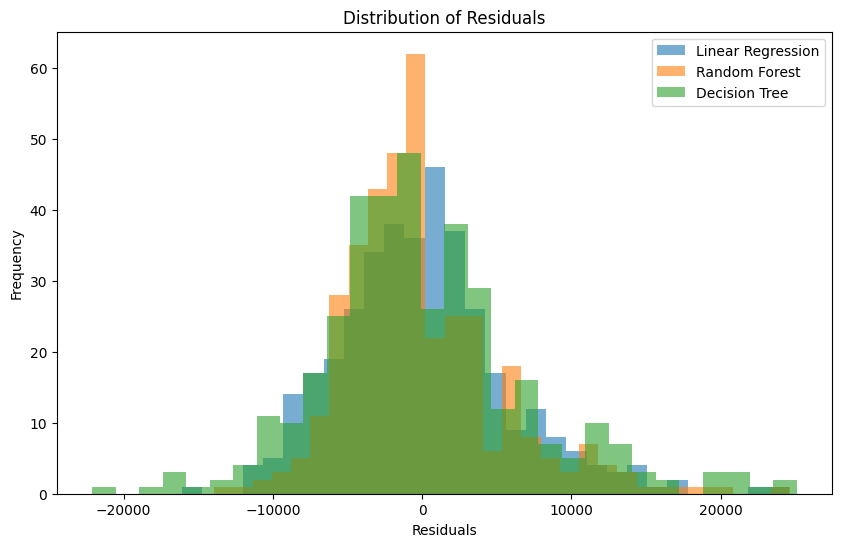

In [222]:
plt.figure(figsize=(10, 6))

# Linear Regression Residuals Distribution
plt.hist(residuals_lr, bins=30, alpha=0.6, label='Linear Regression')

# Random Forest Regressor Residuals Distribution
plt.hist(residuals_rf, bins=30, alpha=0.6, label='Random Forest')

# Decision Tree Regressor Residuals Distribution
plt.hist(residuals_dt, bins=30, alpha=0.6, label='Decision Tree')

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.legend()
plt.show()

In [1]:
!pip install flask_ngrok pyngrok sentence-transformers

In [3]:
from google.colab import userdata
auth=userdata.get('ngrok')

In [4]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
from pyngrok import ngrok
from datetime import datetime
from google.colab import drive
from flask_ngrok import run_with_ngrok
from sklearn.preprocessing import StandardScaler
from flask import Flask, render_template, request, jsonify

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sentence_transformers import SentenceTransformer
import pandas as pd
import pickle

# Specify the path to the saved model file
model_file_path = '/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/decision_tree_reg_latest.pkl'

# Load the model from the file
with open(model_file_path, 'rb') as model_file:
    loaded_decision_tree_reg = pickle.load(model_file)

import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the PCA and StandardScaler objects
n_components = 23  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
scaler = StandardScaler()

# Load the Sentence Transformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize the SentenceTransformer model
model = SentenceTransformer('flax-sentence-embeddings/all_datasets_v4_MiniLM-L6')

# Create a function for prediction
def predict_price(input_data, lr_model, pca, scaler):
    # Prepare the input data
    text_columns = [
        'Package Name', 'Destination', 'Itinerary', 'Places Covered',
        'Hotel Details', 'Airline', 'Sightseeing Places Covered', 'Cancellation Rules'
    ]

    # Initialize an empty DataFrame
    df = pd.DataFrame([input_data])

    # Encode text-based columns and create embeddings
    for column in text_columns:
        df[column + '_embedding'] = df[column].apply(lambda text: model.encode(text))

    # Apply PCA separately to each text embedding column
    n_components = 23  # Adjust the number of components as needed
    text_embeddings_pca = np.empty((len(df), n_components * len(text_columns)))

    for i, column in enumerate(text_columns):
        embeddings = df[column + '_embedding'].values.tolist()
        embeddings_pca = pca.transform(embeddings)
        text_embeddings_pca[:, i * n_components:(i + 1) * n_components] = embeddings_pca

    # Combine text embeddings with other numerical features if available
    numerical_features = [
        'Package Type_Standard', 'Package Type_Premium', 'Package Type_Luxury',
        'Travel_Month', 'Package Type_Budget', 'Package Type_Deluxe',
        'Hotel Ratings', 'Start City_New Delhi', 'Start City_Mumbai',
        'Travel_DayOfWeek', 'Travel_Year'
    ]

    X_numerical = df[numerical_features].values

    # Combine PCA-transformed text embeddings and numerical features
    X = np.hstack((text_embeddings_pca, X_numerical))

    # Scale the data using the same scaler used during training
    X = scaler.transform(X)

    # Make predictions using the trained Linear Regression model
    y_pred = lr_model.predict(X)

    return y_pred[0]

In [8]:
df_input = pd.read_csv('/content/marketing_sample_for_makemytrip_com-travel__20190901_20190930__30k_data.csv',on_bad_lines='skip')


# Filling missing values for Hotel Details with 'Not Available'
df_input['Hotel Details'].fillna('Not Available', inplace=True)

# Filling missing values for Airline with 'Not Available'
df_input['Airline'].fillna('Not Available', inplace=True)

# Filling missing values for Onwards Return Flight Time with 'Not Available'
df_input['Onwards Return Flight Time'].fillna('Not Available', inplace=True)

# Filling missing values for Sightseeing Places Covered with 'Not Available'
df_input['Sightseeing Places Covered'].fillna('Not Available', inplace=True)

# Filling missing values for Initial Payment For Booking with 0 (assuming no initial payment)
df_input['Initial Payment For Booking'].fillna(0, inplace=True)

# Filling missing values for Cancellation Rules with 'Not Available'
df_input['Cancellation Rules'].fillna('Not Available', inplace=True)

# Dropping columns with all missing values (Flight Stops, Date Change Rules, Unnamed: 22, Unnamed: 23)
df_input.drop(columns=["Flight Stops", "Meals", "Initial Payment For Booking", "Date Change Rules"], inplace=True)
df_input['Travel Date'] = pd.to_datetime(df_input['Travel Date'], format='%d-%m-%Y', errors='coerce')
allowed_package_types = ['Deluxe', 'Standard', 'Premium', 'Luxury', 'Budget']

# Filter the DataFrame to keep only the rows with allowed package types
df_input = df_input[df_input['Package Type'].isin(allowed_package_types)]
df_input.drop('Company', axis=1, inplace=True)
df_input.drop('Crawl Timestamp', axis=1, inplace=True)

# Extracting hotel ratings from Hotel Details
df_input['Hotel Ratings'] = df_input['Hotel Details'].str.extract(r'(\d+\.\d+)')

# Convert 'Hotel Ratings' to numeric (float)
df_input['Hotel Ratings'] = pd.to_numeric(df_input['Hotel Ratings'], errors='coerce')

# Calculate the mode of the 'Hotel Ratings' column
mode_rating = df_input['Hotel Ratings'].mode()[0]

# Replace NaN values with the mode
df_input['Hotel Ratings'].fillna(mode_rating, inplace=True)

# Assuming your data is stored in a DataFrame called 'df_input'
df_input['Travel Date'] = pd.to_datetime(df_input['Travel Date'])
df_input['Travel_Year'] = df_input['Travel Date'].dt.year
df_input['Travel_Month'] = df_input['Travel Date'].dt.month
df_input['Travel_DayOfWeek'] = df_input['Travel Date'].dt.dayofweek

# Example of one-hot encoding
df_input = pd.get_dummies(df_input, columns=['Package Type','Start City'])

Q1 = df_input['Per Person Price'].quantile(0.25)
Q3 = df_input['Per Person Price'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers
df_input = df_input[(df_input['Per Person Price'] >= lower_bound) & (df_input['Per Person Price'] <= upper_bound)]

/tmp/ipython-input-3388039778.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_input['Hotel Details'].fillna('Not Available', inplace=True)
/tmp/ipython-input-3388039778.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [9]:
row_index = 100  # Replace with the desired row index

# Access the row from df_input using iloc
input_row = df_input.iloc[row_index]

# Create an input dictionary from the selected row
input_data = {
    'Package Name': input_row['Package Name'],
    'Destination': input_row['Destination'],
    'Itinerary': input_row['Itinerary'],
    'Places Covered': input_row['Places Covered'],
    'Hotel Details': input_row['Hotel Details'],
    'Airline': input_row['Airline'],
    'Sightseeing Places Covered': input_row['Sightseeing Places Covered'],
    'Cancellation Rules': input_row['Cancellation Rules'],
    'Package Type_Standard': input_row['Package Type_Standard'],
    'Package Type_Premium': input_row['Package Type_Premium'],
    'Package Type_Luxury': input_row['Package Type_Luxury'],
    'Travel_Month': input_row['Travel_Month'],
    'Package Type_Budget': input_row['Package Type_Budget'],
    'Package Type_Deluxe': input_row['Package Type_Deluxe'],
    'Hotel Ratings': input_row['Hotel Ratings'],
    'Start City_New Delhi': input_row['Start City_New Delhi'],
    'Start City_Mumbai': input_row['Start City_Mumbai'],
    'Travel_DayOfWeek': input_row['Travel_DayOfWeek'],
    'Travel_Year': input_row['Travel_Year']
}
import joblib

# Load the models from the files
loaded_lr_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/decision_tree_reg_latest.joblib')
loaded_pca = joblib.load('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/pca.joblib')
loaded_scaler = joblib.load('/content/drive/MyDrive/Colab Notebooks/Assignments/Masters Assignment/Specializations /Dataset/scaler.joblib')

# predicted_price = str(predict_price(input_data, loaded_lr_model, loaded_pca, loaded_scaler))[-10:]
# print(f'Predicted Per Person Price: ${predicted_price}')

In [32]:
!lsof -t -i:5000 | xargs kill -9



Usage:
 kill [options] <pid> [...]

Options:
 <pid> [...]            send signal to every <pid> listed
 -<signal>, -s, --signal <signal>
                        specify the <signal> to be sent
 -q, --queue <value>    integer value to be sent with the signal
 -l, --list=[<signal>]  list all signal names, or convert one to a name
 -L, --table            list all signal names in a nice table

 -h, --help     display this help and exit
 -V, --version  output version information and exit

For more details see kill(1).


In [33]:
!ngrok authtoken '2p9tD2FmZHig1l7VPF1a4QNr7WX_JRpVo2gwqakfBQaytF2'

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [37]:
!ngrok authtoken "2V1dW3QU9dMtAmG2PST5tArWbtq_54ssb8xUdLtCh5Z5uvFhL"

app = Flask(__name__)
run_with_ngrok(app)

@app.route('/', methods=['GET', 'POST'])
def predict():
    return """

    <!DOCTYPE html>
<html>
<head>
    <title>Travel Package Prediction</title>
    <style>
        body {
            font-family: 'Poppins', sans-serif;
            background-color: #f9f9f9;
            margin: 0;
            padding: 0;
        }

        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 40px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 10px 20px rgba(0, 0, 0, 0.1);
            text-align: center;
        }

        h1 {
            color: #007BFF;
            font-size: 36px;
            margin-bottom: 20px;
        }

        form {
            text-align: left;
        }

        input[type="text"],
        input[type="number"] {
            width: 100%;
            padding: 15px;
            margin: 15px 0;
            border: none;
            border-bottom: 2px solid #007BFF;
            font-size: 18px;
            background-color: transparent;
            color: #333;
            transition: border-bottom 0.3s ease;
        }

        input[type="text"]:focus,
        input[type="number"]:focus {
            border-bottom: 2px solid #0056b3;
            outline: none;
        }

        input[type="checkbox"],
        input[type="radio"] {
            margin-right: 10px;
        }

        input[type="submit"] {
            background-color: #007BFF;
            color: #fff;
            padding: 15px 30px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 20px;
            transition: background-color 0.3s ease;
        }

        input[type="submit"]:hover {
            background-color: #0056b3;
        }

        p#prediction {
            margin-top: 20px;
            font-size: 24px;
            color: #007BFF;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Travel Package Prediction</h1>
        <form action="/predict" method="POST">

    <label>Package Name:</label>
    <input type="text" name="Package Name" value="A Grand Week in North East - Lachung Special">

    <label>Destination:</label>
    <input type="text" name="Destination" value="Gangtok|Lachung|Gangtok|Darjeeling">

    <label>Itinerary:</label>
    <input type="text" name="Itinerary" value="2N Gangtok . 2N Lachung . 1N Gangtok . 2N Darjeeling">

    <label>Places Covered:</label>
    <input type="text" name="Places Covered" value="Gangtok|Lachung|Gangtok|Darjeeling">

    <label>Hotel Details:</label>
    <input type="text" name="Hotel Details" value="Lemon Tree Hotel Gangtok:4.2|Summit Alpine Resort Lachung:4.2">

    <label>Airline:</label>
    <select name="Airline">
        <option value="Air India">Air India</option>
        <option value="IndiGo">IndiGo</option>
        <option value="Vistara">Vistara</option>
        <option value="SpiceJet">SpiceJet</option>
    </select>

    <label>Sightseeing Places Covered:</label>
    <input type="text" name="Sightseeing Places Covered"
           value="Baba Mandir | Lake Tsomgo | Yumthang Valley">

    <label>Cancellation Rules:</label>
    <input type="text" name="Cancellation Rules" value="Not Available">


    <!-- PACKAGE TYPE CHECKBOXES -->
    <label>Package Type:</label><br>
    <input type="checkbox" name="Package Type_Standard" value="1"> Standard<br>
    <input type="checkbox" name="Package Type_Premium" value="1"> Premium<br>
    <input type="checkbox" name="Package Type_Luxury" value="1"> Luxury<br>
    <input type="checkbox" name="Package Type_Budget" value="1"> Budget<br>
    <input type="checkbox" name="Package Type_Deluxe" value="1"> Deluxe<br><br>


    <!-- TRAVEL MONTH DROPDOWN -->
    <label>Travel Month:</label>
    <select name="Travel_Month">
        <option value="1">January</option>
        <option value="2">February</option>
        <option value="3">March</option>
        <option value="4">April</option>
        <option value="5" selected>May</option>
        <option value="6">June</option>
        <option value="7">July</option>
        <option value="8">August</option>
        <option value="9">September</option>
        <option value="10">October</option>
        <option value="11">November</option>
        <option value="12">December</option>
    </select>

    <label>Hotel Ratings:</label>
    <input type="number" name="Hotel Ratings" value="4.5" min="0" max="5" step="0.1">

    <!-- START CITY DROPDOWN -->
    <label>Start City:</label>
    <select name="Start City">
        <option value="New Delhi">New Delhi</option>
        <option value="Mumbai">Mumbai</option>
        <option value="Bangalore">Bangalore</option>
        <option value="Hyderabad">Hyderabad</option>
    </select>

    <!-- TRAVEL DAY OF WEEK -->
    <label>Travel Day Of Week:</label>
    <select name="Travel_DayOfWeek">
        <option value="0">Sunday</option>
        <option value="1">Monday</option>
        <option value="2" selected>Tuesday</option>
        <option value="3">Wednesday</option>
        <option value="4">Thursday</option>
        <option value="5">Friday</option>
        <option value="6">Saturday</option>
    </select>

    <!-- TRAVEL YEAR -->
    <label>Travel Year:</label>
    <select name="Travel_Year">
        <option value="2023">2023</option>
        <option value="2024">2024</option>
        <option value="2025">2025</option>
        <option value="2026">2026</option>
        <option value="2027">2027</option>
    </select>

    <br><br>
    <input type="submit" value="Predict">
</form>
        <p id="prediction"></p>
    </div>
</body>
</html>


    """


@app.route('/predict', methods=['POST'])
def index():
    if request.method == 'POST':
        # Get input data from the form
        package_name = request.form.get('Package Name')
        destination = request.form.get('Destination')
        itinerary = request.form.get('Itinerary')
        places_covered = request.form.get('Places Covered')
        hotel_details = request.form.get('Hotel Details')
        airline = request.form.get('Airline')
        sightseeing_places = request.form.get('Sightseeing Places Covered')
        cancellation_rules = request.form.get('Cancellation Rules')
        package_standard = int(request.form.get('Package Type_Standard', 0))
        package_premium = int(request.form.get('Package Type_Premium', 0))
        package_luxury = int(request.form.get('Package Type_Luxury', 0))
        travel_month = int(request.form.get('Travel_Month'))
        package_budget = int(request.form.get('Package Type_Budget', 0))
        package_deluxe = int(request.form.get('Package Type_Deluxe', 0))
        hotel_ratings = float(request.form.get('Hotel Ratings'))
        start_city = request.form.get('Start City')
        start_city_delhi = 1 if start_city == "New Delhi" else 0
        start_city_mumbai = 1 if start_city == "Mumbai" else 0
        travel_day_of_week = int(request.form.get('Travel_DayOfWeek'))
        travel_year = int(request.form.get('Travel_Year'))

        # Create a dictionary to store the input data
        data = {
            'Package Name': package_name,
            'Destination': destination,
            'Itinerary': itinerary,
            'Places Covered': places_covered,
            'Hotel Details': hotel_details,
            'Airline': airline,
            'Sightseeing Places Covered': sightseeing_places,
            'Cancellation Rules': cancellation_rules,
            'Package Type_Standard': package_standard,
            'Package Type_Premium': package_premium,
            'Package Type_Luxury': package_luxury,
            'Travel_Month': travel_month,
            'Package Type_Budget': package_budget,
            'Package Type_Deluxe': package_deluxe,
            'Hotel Ratings': hotel_ratings,
            'Start City_New Delhi': start_city_delhi,
            'Start City_Mumbai': start_city_mumbai,
            'Travel_DayOfWeek': travel_day_of_week,
            'Travel_Year': travel_year
        }

        # Perform prediction using the custom_input dictionary
        prediction = predict_price(data, loaded_lr_model, loaded_pca, loaded_scaler)//10
        prediction = str(prediction)[-7:]

        return jsonify({'prediction': prediction})


run_with_ngrok(app)

app.run()

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Exception in thread Thread-26:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
Thread-25:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 